<a href="https://colab.research.google.com/github/hochthom/OG-AI4Artists-2022/blob/main/Interface-Enrichment/Pose_MediaPipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pose Estimation
Usage example of MediaPipe Pose Solution API in Python (see also http://solutions.mediapipe.dev/pose).

In [2]:
!pip install mediapipe

Upload any image that that has a person with visible upper body to the Colab.

In [9]:
from google.colab import files

uploaded = files.upload()

Saving oksana-taran-xB4ExGcUai0-unsplash.jpg to oksana-taran-xB4ExGcUai0-unsplash.jpg


oksana-taran-xB4ExGcUai0-unsplash.jpg


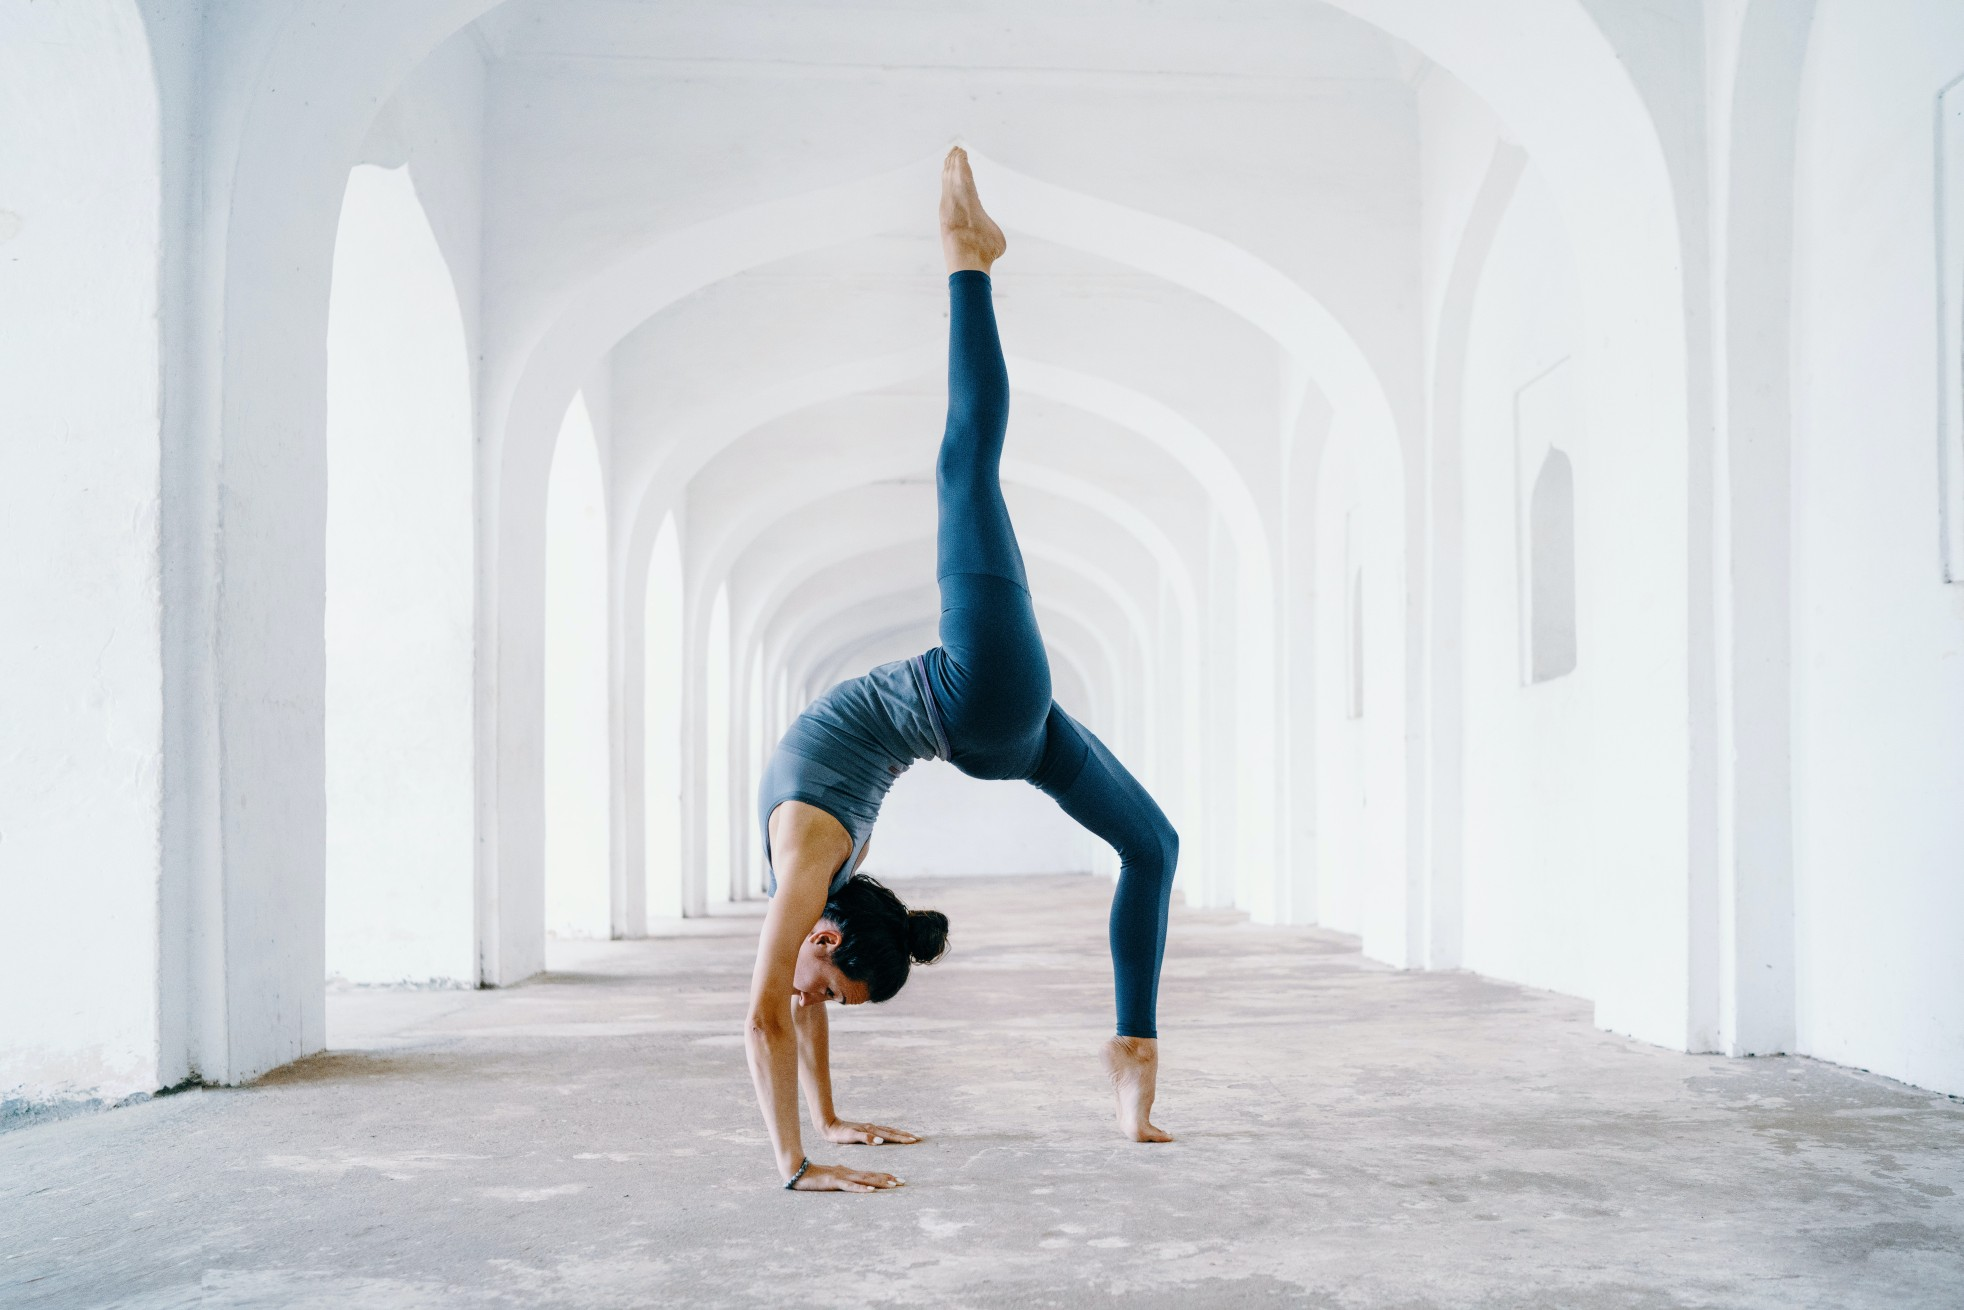

In [10]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}

# Preview the images.
for name, image in images.items():
  print(name)   
  cv2_imshow(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

The parameters, such as `static_image_mode` and `min_detection_confidence`, can be only changed during the initialization.

In [15]:
import mediapipe as mp

# Initialize MediaPipe Pose.
pose = mp.solutions.pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5)

In [16]:
# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=2, circle_radius=2)

Pose landmarks of oksana-taran-xB4ExGcUai0-unsplash.jpg:


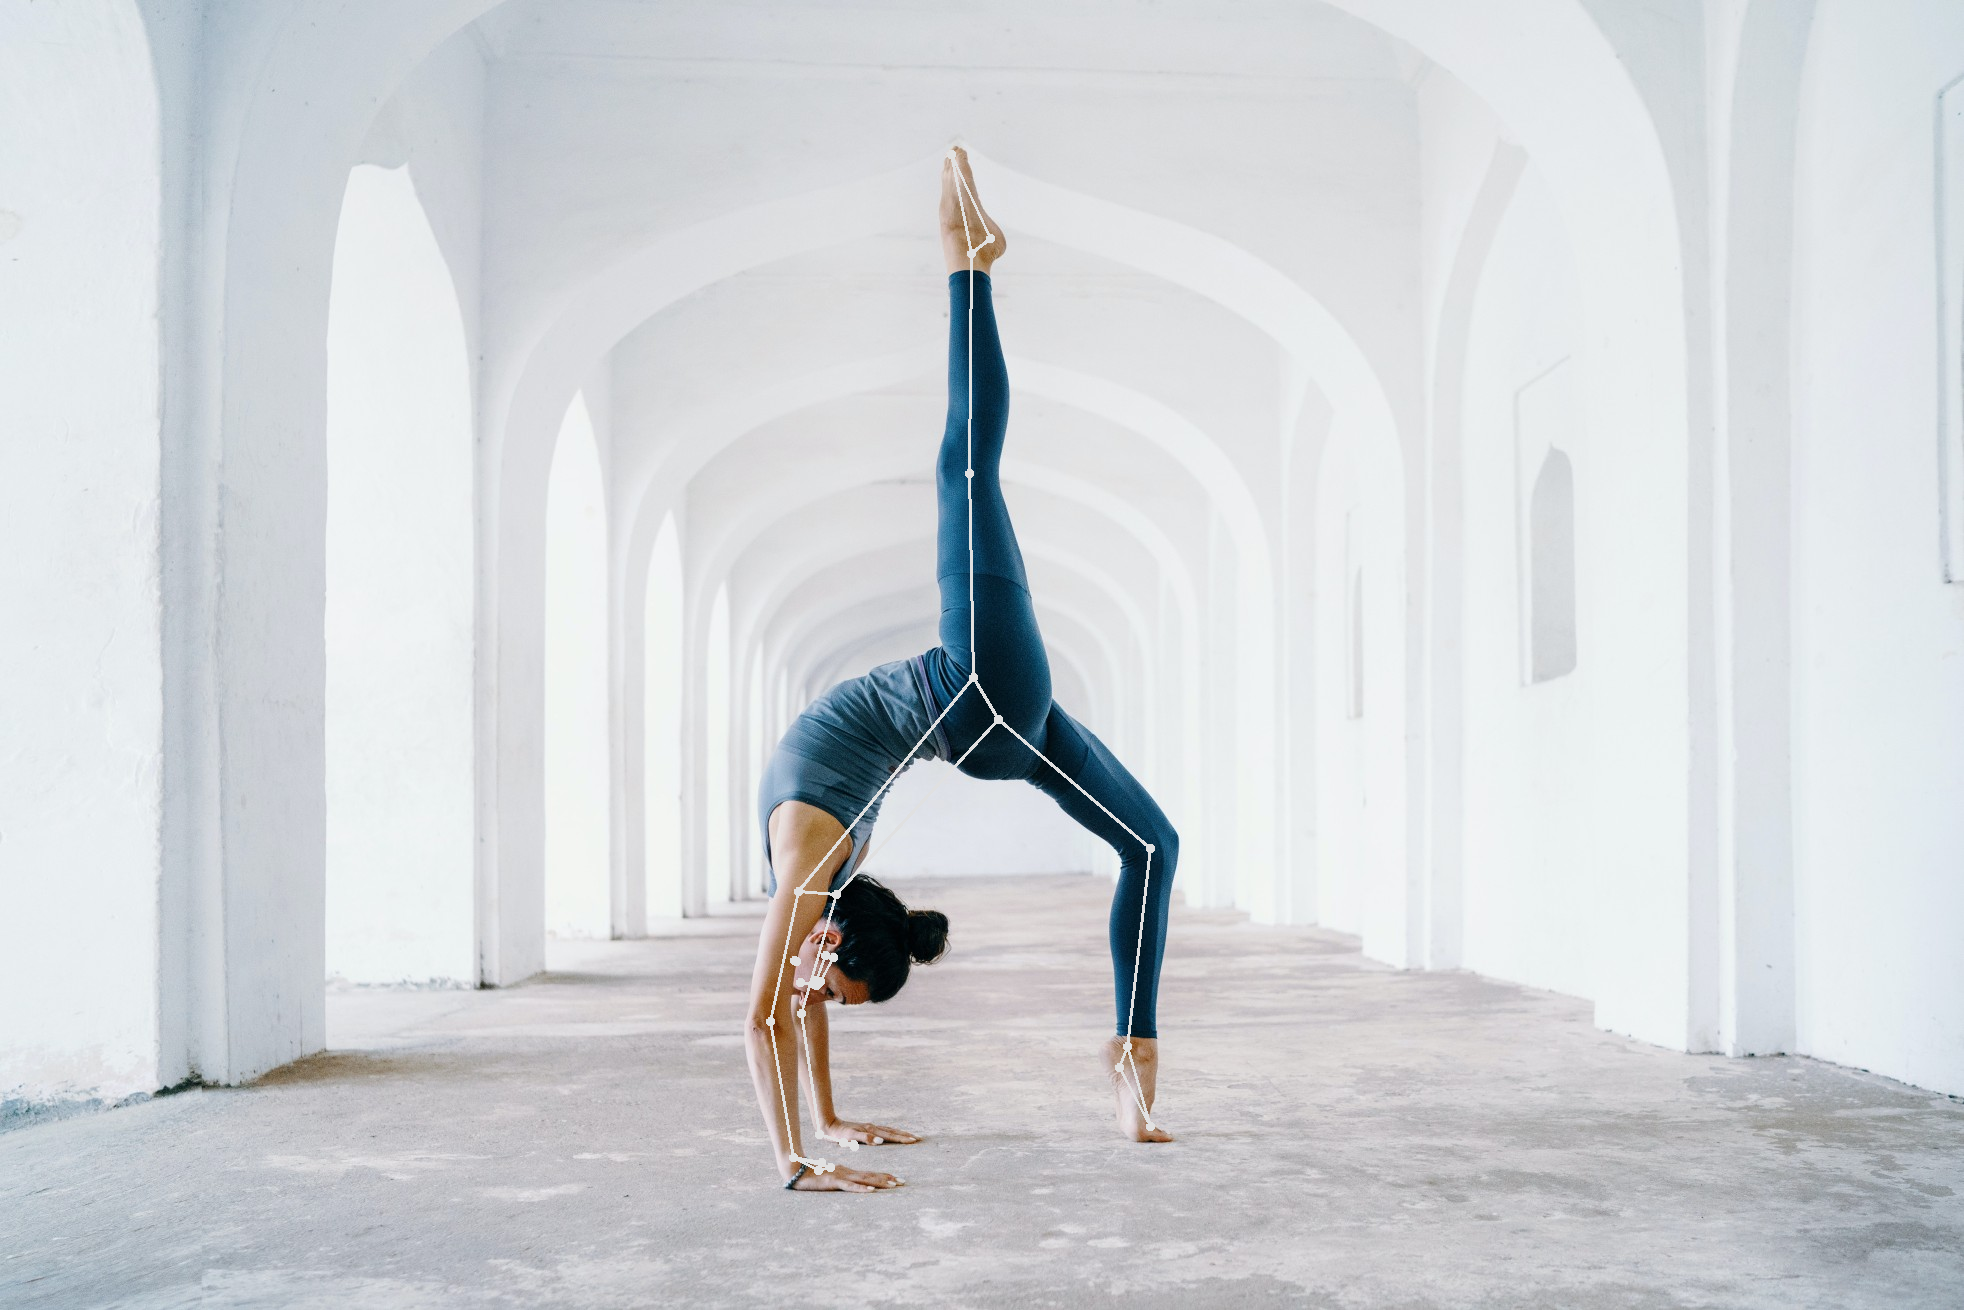

In [17]:
for name, image in images.items():
  # Convert the BGR image to RGB and process it with MediaPipe Pose.
  results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  # Print nose landmark.
  image_hight, image_width, _ = image.shape
  if not results.pose_landmarks:
    continue

  # Draw pose landmarks.
  print(f'Pose landmarks of {name}:')
  annotated_image = image.copy()
  mp_drawing.draw_landmarks(
      image=annotated_image,
      landmark_list=results.pose_landmarks,
      connections=mp.solutions.pose.POSE_CONNECTIONS, 
      landmark_drawing_spec=drawing_spec,
      connection_drawing_spec=drawing_spec)
  cv2_imshow(annotated_image)